# DFT of sinusoids with different amounts of data
## Look at performance gains of zero padding if no extra data exists


In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import cmath
from scipy.fftpack import fft, ifft, fftfreq, fftshift
import pandas as pd
j = complex(0,1)

Running Python: 3.8.19
Running Sympy: 1.12.1


In [2]:
Fs = 1000 #                    % Sampling frequency
T = 1/Fs #                     % Sampling period
L = 4096 #                     % Length of signal

# full set of data
n = int(2**np.ceil(np.log2(L))) #
f = np.linspace(0,1/2-1/n,n)*Fs #   % freq vector 

# a shorter chunk of data to use
na = int(L/4)                      
fa = np.linspace(0,1/2-1/na,na)*Fs #   % freq vector 

In [3]:
#For algorithm performance purposes, fft allows you to pad the input with trailing zeros. 
#In this case, pad each row of X with zeros so that the length of each row is the next higher 
#power of 2 from the current length. Define the new length using the nextpow2 function.
t = np.arange(L)*T #                Time vector
f_sig1 = 20 #hz
ph_offset = np.random.rand()*2*np.pi

x1 = np.cos(2*np.pi*f_sig1*t) + np.sin(2*np.pi*f_sig1*3*t+ph_offset) + np.random.rand(1,L)/2
x1 = x1.flatten()
xa = x1[0:na]
x2 = np.append(xa,0*x1[na-1:-1])

In [4]:
# Compute FFT
Y1 = fft(x1)
Ya = fft(xa)
Y2 = fft(x2)
Y1_plot = 1.0/n * fftshift(Y1)
Ya_plot = 1.0/na * fftshift(Ya)
Y2_plot = 1.0/n * fftshift(Y2)

xf = fftfreq(n, 1/Fs)
xf_plot = fftshift(xf)
xfa = fftfreq(na, 1/Fs)
xfa_plot = fftshift(xfa)

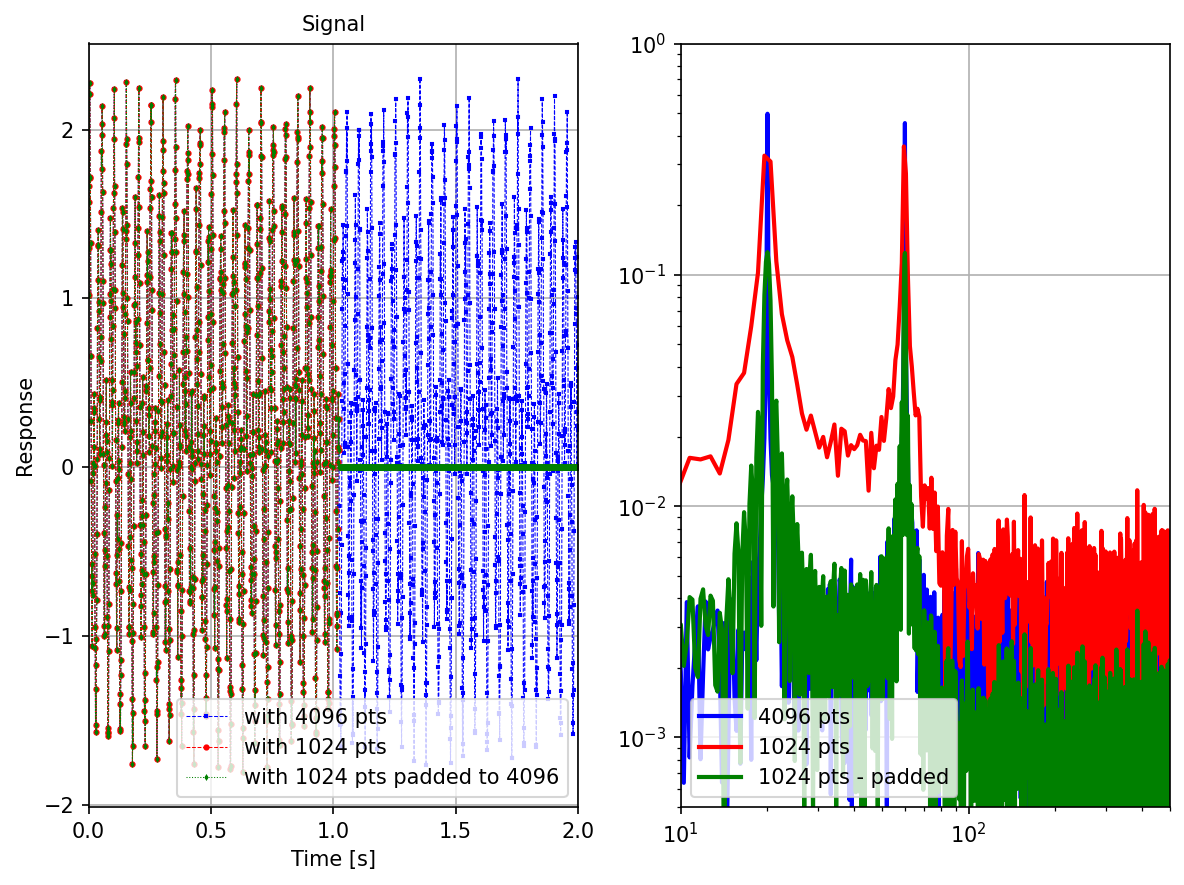

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,6), dpi=150)
ax1.plot(t, x1,'bs--',label='with 4096 pts',lw=0.5,ms=1)
ax1.plot(t[0:na], xa,'ro--',label='with 1024 pts',lw=0.5,ms=2)
ax1.plot(t, x2,'gd:',label='with 1024 pts padded to 4096',lw=0.5,ms=1)
ax1.set_ylabel('Response')
ax1.set_xlabel('Time [s]')
ax1.set_title('Signal')
ax1.legend()
ax1.set_xlim([0, 2])

ax2.loglog(xf_plot, np.abs(Y1_plot),'b-',label='4096 pts')
ax2.loglog(xfa_plot, np.abs(Ya_plot),'r-',label='1024 pts')
ax2.loglog(xf_plot, np.abs(Y2_plot),'g-',label='1024 pts - padded')
ax2.set_xlim([10, 500])
ax2.set_ylim([5e-4, 1])
ax2.legend(loc=3)
fig.savefig('./figs/T8_ex9_1.pdf', dpi=300)
plt.show()